In [249]:
import numpy as np
import pandas as pd

In [250]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [251]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [252]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [253]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [254]:
# concatenating the train and test dataset

train = train_df.drop('SalePrice', axis = 1)
data = pd.concat([train,test_df],axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [255]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


# Data Cleaning

In [256]:
# removing the columns with 50% null values

threshold = len(data)*0.5
data = data.dropna(axis = 1, thresh = threshold)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [257]:
# Separating Categorical and numerical columns

categorical_col = data.select_dtypes(include=['object']).columns
numerical_col = data.select_dtypes(exclude=['object']).columns

print(f"shape of categorical columns: {len(categorical_col)} and numerical columns: {len(numerical_col)}")

shape of categorical columns: 39 and numerical columns: 37


In [258]:
# handling missing values for categorical variables
for col in categorical_col:
    if data[col].isnull().any():
      mode_value = data[col].mode()[0]
      data[col].fillna(mode_value, inplace = True)
data[categorical_col]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Gd,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [260]:
# handling missing values for numerical data
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data[numerical_col] = imputer.fit_transform(data[numerical_col])
data[numerical_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   float64
 1   MSSubClass     2919 non-null   float64
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   float64
 4   OverallQual    2919 non-null   float64
 5   OverallCond    2919 non-null   float64
 6   YearBuilt      2919 non-null   float64
 7   YearRemodAdd   2919 non-null   float64
 8   MasVnrArea     2919 non-null   float64
 9   BsmtFinSF1     2919 non-null   float64
 10  BsmtFinSF2     2919 non-null   float64
 11  BsmtUnfSF      2919 non-null   float64
 12  TotalBsmtSF    2919 non-null   float64
 13  1stFlrSF       2919 non-null   float64
 14  2ndFlrSF       2919 non-null   float64
 15  LowQualFinSF   2919 non-null   float64
 16  GrLivArea      2919 non-null   float64
 17  BsmtFullBath   2919 non-null   float64
 18  BsmtHalf

In [261]:
from scipy.stats import skew

numeric_col = data.select_dtypes(include = ['number'])
skewness_result = numeric_col.apply(lambda x: skew(x))

skewness_df = pd.DataFrame({'Columns': skewness_result.index, 'skewness': skewness_result.values})
skewness_df['Positive Skew'] = skewness_df['skewness']>0
skewness_df['Negative Skew'] = skewness_df['skewness']<0
skewness_df['significant skew'] = abs(skewness_df['skewness'])>1
skewness_df

,Columns,skewness,Positive Skew,Negative Skew,significant skew
0,Id,0.000000,False,False,False
1,MSSubClass,1.375457,True,False,True
2,LotFrontage,1.359033,True,False,True
3,LotArea,12.822431,True,False,True
4,OverallQual,0.197110,True,False,False
5,OverallCond,0.570312,True,False,False
6,YearBuilt,-0.599806,False,True,False
7,YearRemodAdd,-0.451020,False,True,False
8,MasVnrArea,2.595643,True,False,True
9,BsmtFinSF1,1.425230,True,False,True


In [262]:
skewed_col = skewness_result[abs(skewness_result)>1].index
data[skewed_col] = np.log1p(data[skewed_col])
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,4.110874,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,...,4.127134,0.000000,0.0,0.0,0.0,0.000000,2.0,2008.0,WD,Normal
1,2.0,3.044522,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,5.0,2007.0,WD,Normal
2,3.0,4.110874,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,...,3.761200,0.000000,0.0,0.0,0.0,0.000000,9.0,2008.0,WD,Normal
3,4.0,4.262680,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,...,3.583519,5.609472,0.0,0.0,0.0,0.000000,2.0,2006.0,WD,Abnorml
4,5.0,4.110874,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,...,4.442651,0.000000,0.0,0.0,0.0,0.000000,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,5.081404,RM,3.091042,7.568896,Pave,Reg,Lvl,AllPub,Inside,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,6.0,2006.0,WD,Normal
1455,2916.0,5.081404,RM,3.091042,7.546974,Pave,Reg,Lvl,AllPub,Inside,...,3.218876,0.000000,0.0,0.0,0.0,0.000000,4.0,2006.0,WD,Abnorml
1456,2917.0,3.044522,RL,5.081404,9.903538,Pave,Reg,Lvl,AllPub,Inside,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,9.0,2006.0,WD,Abnorml
1457,2918.0,4.454347,RL,4.143135,9.253591,Pave,Reg,Lvl,AllPub,Inside,...,3.496508,0.000000,0.0,0.0,0.0,6.552508,7.0,2006.0,WD,Normal


# Label Encoding

In [263]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_col:
  data[col] = label_encoder.fit_transform(data[col])

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   float64
 1   MSSubClass     2919 non-null   float64
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   float64
 5   Street         2919 non-null   int64  
 6   LotShape       2919 non-null   int64  
 7   LandContour    2919 non-null   int64  
 8   Utilities      2919 non-null   int64  
 9   LotConfig      2919 non-null   int64  
 10  LandSlope      2919 non-null   int64  
 11  Neighborhood   2919 non-null   int64  
 12  Condition1     2919 non-null   int64  
 13  Condition2     2919 non-null   int64  
 14  BldgType       2919 non-null   int64  
 15  HouseStyle     2919 non-null   int64  
 16  OverallQual    2919 non-null   float64
 17  OverallCond    2919 non-null   float64
 18  YearBuil

# Scaling the data

In [265]:
from sklearn.preprocessing import StandardScaler

column_names = data.columns.tolist()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(data = scaled_data, columns = column_names)

# target transformation

<ipython-input-266-a81458937870>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, kde=True, fit=stats.norm)
<ipython-input-266-a81458937870>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(target), kde=True, fit=stats.norm)


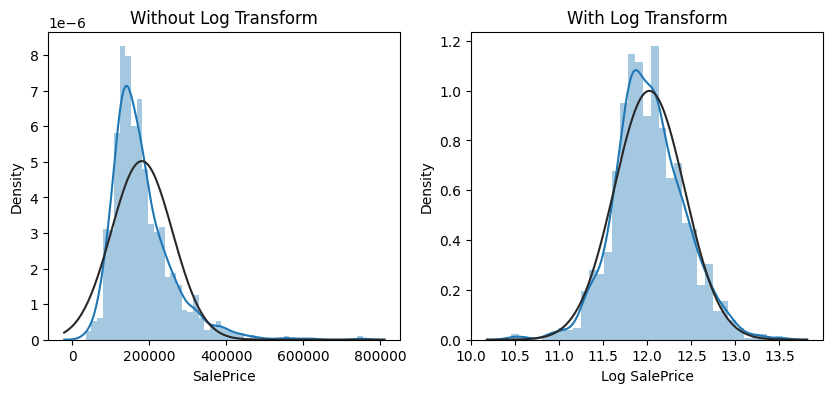

In [266]:
import seaborn as sns
import scipy.stats as stats

target = train_df.SalePrice

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

# Feature Selection

In [267]:
# Using correlation analysis to identify features with high correaltion with target variables

target = np.log(target)

correlation = data.corrwith(target)
sorted_corr = correlation.abs().sort_values(ascending = False)

corr_thresh = 0.2
selected_features = sorted_corr[sorted_corr>corr_thresh]
selected_features_names = selected_features.index.tolist()

data = data[selected_features_names]

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    2919 non-null   float64
 1   GrLivArea      2919 non-null   float64
 2   GarageCars     2919 non-null   float64
 3   GarageArea     2919 non-null   float64
 4   1stFlrSF       2919 non-null   float64
 5   FullBath       2919 non-null   float64
 6   YearBuilt      2919 non-null   float64
 7   ExterQual      2919 non-null   float64
 8   BsmtQual       2919 non-null   float64
 9   GarageFinish   2919 non-null   float64
 10  YearRemodAdd   2919 non-null   float64
 11  GarageYrBlt    2919 non-null   float64
 12  TotRmsAbvGrd   2919 non-null   float64
 13  KitchenQual    2919 non-null   float64
 14  Fireplaces     2919 non-null   float64
 15  OpenPorchSF    2919 non-null   float64
 16  HeatingQC      2919 non-null   float64
 17  MasVnrArea     2919 non-null   float64
 18  Foundati

In [268]:
corr = data.corrwith(target)
sort = corr.abs().sort_values(ascending = False)
print(sort)

OverallQual      0.817184
GrLivArea        0.730254
GarageCars       0.680625
GarageArea       0.650888
1stFlrSF         0.608955
FullBath         0.594771
YearBuilt        0.586570
ExterQual        0.582163
BsmtQual         0.578729
GarageFinish     0.574118
YearRemodAdd     0.565608
GarageYrBlt      0.545243
TotRmsAbvGrd     0.534422
KitchenQual      0.534386
Fireplaces       0.489449
OpenPorchSF      0.459948
HeatingQC        0.425906
MasVnrArea       0.420844
Foundation       0.412083
LotArea          0.399923
TotalBsmtSF      0.372838
LotFrontage      0.360086
CentralAir       0.351600
WoodDeckSF       0.343039
GarageType       0.342545
2ndFlrSF         0.319300
HalfBath         0.313982
PavedDrive       0.304688
Electrical       0.294400
BsmtExposure     0.283730
LotShape         0.278091
SaleCondition    0.248819
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
HouseStyle       0.214717
BedroomAbvGr     0.209044
BsmtFinSF1       0.208099
EnclosedPorch    0.207263
Neighborhood

In [269]:
from sklearn.model_selection import train_test_split

y = target
X = data[:1460]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape , X_test.shape, y_train.shape, y_test.shape)

(1168, 39) (292, 39) (1168,) (292,)


In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [271]:
y_pred = model.predict(X_test)

In [272]:
mse = mean_squared_error(y_test, y_pred )
r2 = r2_score(y_test, y_pred)

print(f"mean square error is {mse}")
print(f"r2 score is {r2}")

mean square error is 0.020215468814497515
r2 score is 0.8916720020912764


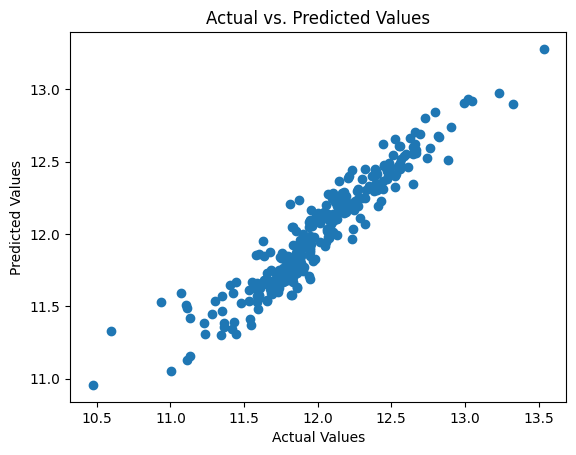

In [277]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
